<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B5%AC%EC%A1%B0%EC%99%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 딥러닝 구조와 레이어(Layer)
딥러닝을 제공하는 API는 어떤 내용으로 구성되어있는지, 또 레이어는 어떻게 사용하는 것인지 살펴봅니다.

## 1.2. 딥러닝 모델
딥러닝을 어떻게 쌓는지 배워보고 실습해봅니다.

## 1. 딥러닝 구조

- 모델 구조

케라스에서 제공하는 API들의 구성도를 살펴보면, 크게 Model API와 Layer API가 있고 필요한 모듈들을 Modules API를 호출해서 사용합니다. 딥러닝 모델은 여러 레이어들로 구성되어 있습니다.
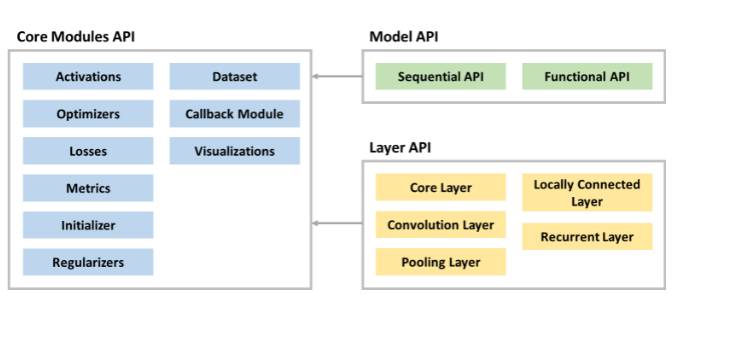




## 2. 레이어(Layer)
먼저 딥러닝을 사용하는데 필요한 라이브러리인 TensorFlow와 keras를 임포트합니다. 또한 케라스(Keras)의 레이어를 사용할 수 있도록 임포트합니다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

딥러닝은 여러 개의 레이어(Layer)로 구성되어 있으며, 기본적으로 입력층(Input Layer), 은닉층(Hidden Layer), 출력층(Output Layer) 으로 구분됩니다. 레이어는 딥러닝 모델을 구성하는 핵심 데이터 구조로서 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다.

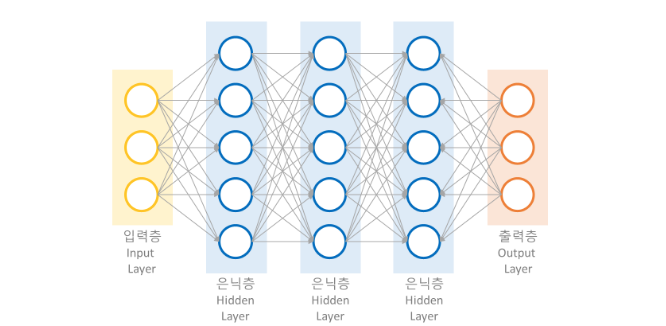

#### Input 객체
딥러닝 모델의 입력을 정의할 때 사용하는 Input 객체는 입력 데이터의 모양인 shape와 예상되는 데이터 유형인 dtype 등을 포함하고 있습니다.

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

Input 객체는 배치 크기를 batch_size로 지정할 수 있고, name을 통해서 이름을 지정할 수도 있습니다.

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

### Dense 레이어
Dense 레이어는 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성됩니다. Dense 레이어에 대한 자세한 내용은 다음 링크를 참조하면 됩니다. https://keras.io/api/layers/core_layers/dense/

In [6]:
layers.Dense(10)

레이어에 name을 통해 이름을 지정하여 레이어간의 구분이 가능합니다.

In [7]:
layers.Dense(10, name='layer1')

레이어에서 사용할 활성화 함수(activation)를 지정하여 생성하는 것이 가능합니다.

In [8]:
layers.Dense(10, activation='softmax')

레이어에 유닛수와 활성화 함수 그리고 이름까지 지정하여 사용하는 것도 가능합니다.

In [9]:
layers.Dense(10, activation='relu', name='Dense Layer')

랜덤으로 값을 만들고, 생성한 레이어에 그 값을 입력으로 사용한 뒤에 레이어 가중치 값과 결과 값을 확인해 봅시다.

In [10]:
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.7835015  0.9850292 ]
 [0.94253266 0.736109  ]
 [0.3914746  0.11481833]
 [0.79513705 0.49935734]
 [0.5781821  0.40673077]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.08948183,  0.17057723, -0.10509521,  0.00179327, -0.27740702,
         0.07974774,  0.17341286,  0.6176    ,  0.00605196,  0.11328721],
       [-0.40844983, -0.40482554,  0.3404724 ,  0.6808316 , -0.41229868,
        -0.14943117, -0.3981933 , -0.67852616,  0.45774895,  0.12865275]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.         0.         0.253033   0.67204404 0.         0.
  0.         0.         0.4556378  0.21548742]
 [0.         0.         0.15156914 0.5028565  0.         0.
  0.         

### Activation 레이어
활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할을 하는데, 크게 선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분할 수 있습니다. 다만 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수 를 사용합니다.

케라스의 Dense 레이어에서 미리 활성화 함수를 지정할 수도 있지만, 필요에 따라 별도의 Activation 레이어를 만들어줄 수 있습니다.

Keras에서 제공하는 활성화 함수(activation function)의 종류: https://keras.io/api/layers/activations/
Activation 레이어가 어떤식으로 동작하는지 살펴보기 위해서 -10부터 10 사이의 수 가운데 100개의 값을 입력 데이터로 사용해 봅시다.

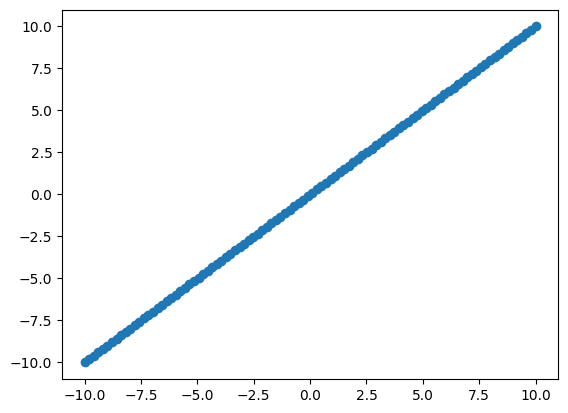

In [11]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

### 시그모이드 함수
활성화 함수 중에서도 오래전부터 사용되던 시그모이드(sigmoid) 함수는 다음과 같이 표현됩니다.

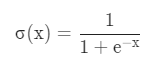

시그모이드 함수는 주로 확률 예측 모델에 자주 사용되며, 출력값이 0과 1 사이로 나타납니다. 그러다보니 0과 1 사이에서 포화(saturate)되는 문제가 있습니다. 즉, 입력값이 작아도 출력값이 0 이하가 될 수 없고, 커져도 1 이상이 될 수 없기 때문에 훈련 시간이 오래걸리고, 그래디언트(gradient)가 0에 가까워져서 가중치 업데이트가 발생하지 않게 됩니다.

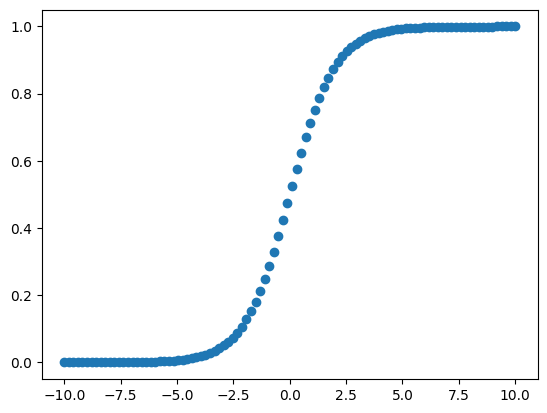

In [12]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

### 하이퍼볼릭 탄젠트 함수
하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수는 다음과 같이 표현됩니다.


​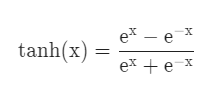

하이퍼볼릭 탄젠트 함수는 0을 중심으로 -1과 1 사이의 값이 나타납니다. 일반적으로 시그모이드 함수보다는 빨리 훈련되지만, 여전히 -1과 1 사이에서 포화되는 문제가 있습니다.

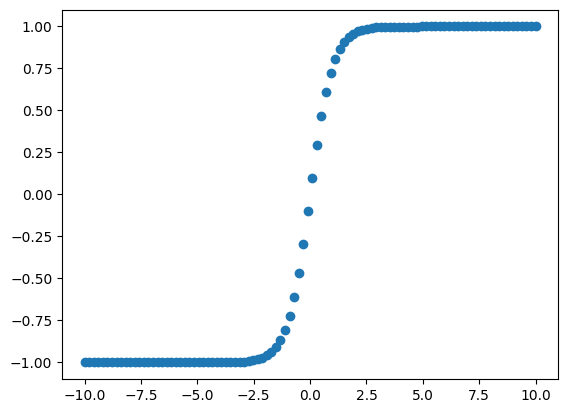

In [13]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

### ReLU 함수
최근에 가장 많이 사용하는 활성화 함수인 ReLU(Rectified Linear Unit)는 다음과 같이 표현됩니다.

f(x)=max(0,x)
ReLU 함수의 출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련됩니다. 다만 ReLU 함수 출력값이 0이 중심이 아니고, 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제가 있습니다.

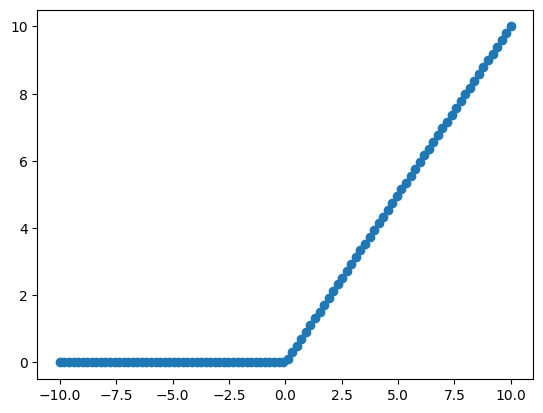

In [14]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

### Leaky ReLU 함수
Leaky ReLU 함수는 ReLU 함수의 문제점, 즉 노드 출력을 0으로만 하던 문제를 해결하였으며 다음과 같이 표현됩니다.

f(x)=max(0.01x,x)

Leaky ReLU 함수는 노드 출력을 0이 아닌 아주 작은 음수값으로 출력하게 만들어 해결하였습니다.

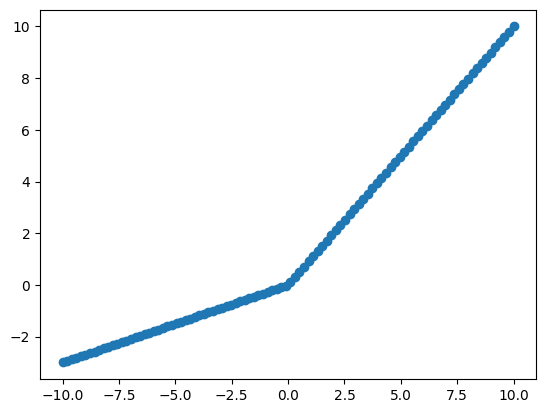

In [15]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### ELU 함수
ELU(Exponential Linear Unit) 함수는 ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수이며, 다음과 같이 표현됩니다.

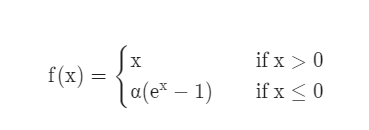

ELU 함수는 0 이하에서는 exponential 연산이 수행되므로 계산 비용이 높아지는 단점이 있습니다.

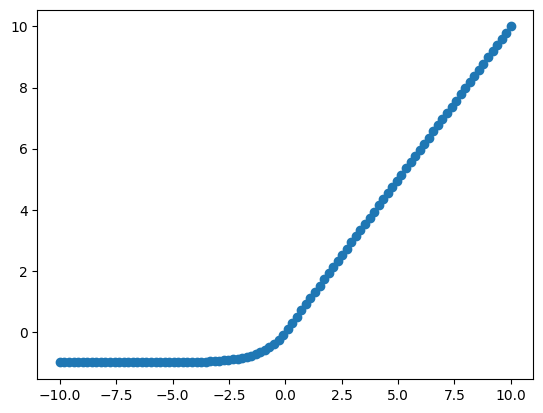

In [16]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### Flatten 레이어
Flatten 레이어는 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환합니다.

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


Q.입력값 (224, 224, 1)를 Flatten 레이어에 넣으면 어떤 크기의 1차원 형태 데이터가 나올까요?


:50176

In [18]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


## 2. 딥러닝 모델
딥러닝 모델을 구성하는 방법은 1) Sequential() 함수를 이용한 Sequential API 방법과 2) Functional API를 이용하는 방법, 그리고 3) Subclassing API를 이용하는 방법이 있습니다.


먼저 케라스(Keras)에서 모델과 유틸리티들을 사용할 수 있도록 `models`, `utils`를 임포트하겠습니다.

Suquential API
- 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법
- 다음 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

Functional API
- 모델 생성에 권장되는 방법
- 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능
- 다중 입출력을 다루 수 있음

Suclassing API
- 커스터마이징에 최적화된 방법으로 Model클래스를 상솟받아서 사용
- Funtional API로도 구현하 수 없는 모델들도 구현이 가능
- 객체지향 프로그래밍(Object-orientend Programming)에 익숙해야 함

In [19]:
from tensorflow.keras import models, utils

Sequential API
Sequential API를 이용하는 방법은 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법입니다. 다만 이 방법은 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

Sequential API를 이용한 방법 중 첫번째는 Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가하는 방법입니다.

In [20]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


plot_model() 함수를 통해 딥러닝 모델의 모습을 시각적으로 확인할 수 있습니다.

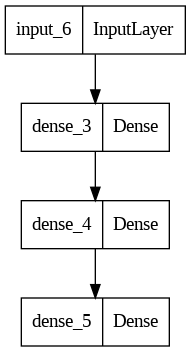

In [21]:
utils.plot_model(model)

다른 방법으로는 Sequential 인자에 한번에 추가하는 방법이 있습니다.

In [22]:
model = models.Sequential([layers.Input(shape=(28,28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                             layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


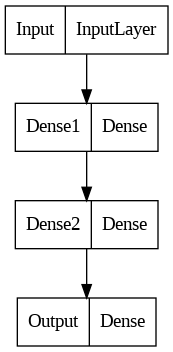

In [23]:
utils.plot_model(model)

### Functional API
모델 생성에 Functional API를 이용하는 방법은 가장 권장되는 방법입니다. Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있습니다.

In [24]:
inputs = layers.Input(shape=(28,28,1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation = 'relu')(x)
x = layers.Dense(100, activation = 'relu')(x)
x = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


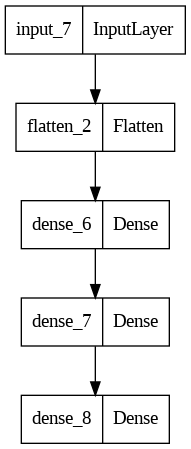

In [25]:
utils.plot_model(model)

Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능합니다. 아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합하였습니다.

In [26]:
inputs = keras.Input(shape=(28,28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation ='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs],outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 30)       3030        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_8[0][0]',                
                                                                  'dense_10[0][0]']         

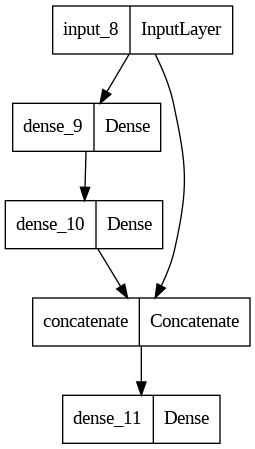

In [27]:
utils.plot_model(model)

Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능합니다.

In [28]:
input_1 = keras.Input(shape=(10,10), name= 'Input_1')
input_2 = keras.Input(shape=(10,28), name= 'Input_2')

hidden1 = layers.Dense(100,activation = 'relu')(input_2)
hidden2 = layers.Dense(10, activation = 'relu')(hidden1)
concat  = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation = 'sigmoid',name = 'output')(concat)

model = models.Model(inputs=[input_1,input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 10)       1010        ['dense_12[0][0]']               
                                                                                            

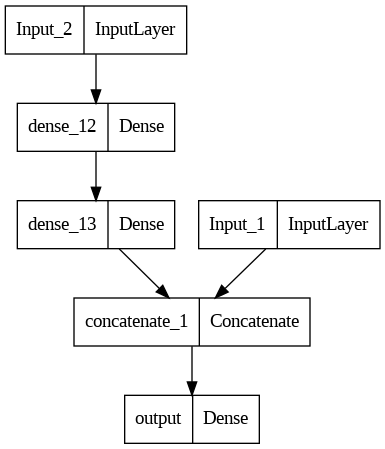

In [29]:
utils.plot_model(model)

Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능합니다.

In [30]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_15 (Dense)               (None, 10, 10)       1010        ['dense_14[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_15[0][0]']               
                                                                                            

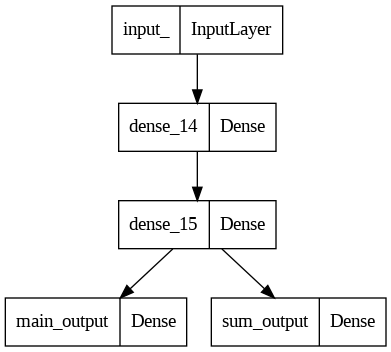

In [31]:
utils.plot_model(model)

Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델도 만들 수 있습니다.

In [32]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 10)       1010        ['dense_16[0][0]']               
                                                                                            

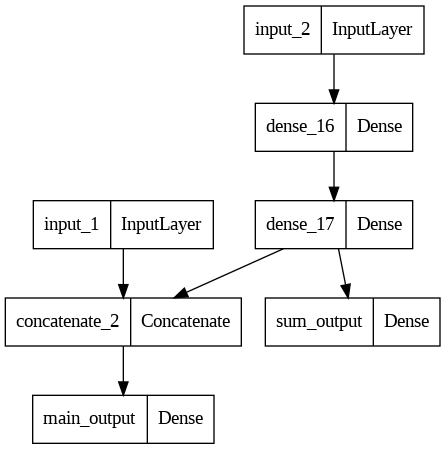

In [33]:
utils.plot_model(model)

### Subclassing API
서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로, Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.

- ```fit()```: 모델 학습
- ```evaluate()```: 모델 평가
- ```predict()```: 모델 예측
- ```save()```: 모델 저장
- ```load()```: 모델 불러오기
- ```call()```: 메소드안에서 원하는 계산 가능

Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만, 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 합니다.

In [34]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

#### 실습해보기
이번에는 위에서 본 것들을 한 번 실습해보는 시간입니다.

어려워보여도 아래 주석을 따라 각각의 방식에 맞춰 모델을 완성해 봅시다.

먼저 Sequential API 방식으로 만들어 봅시다.

Q. 아래 주석을 따라 Seqential API 모델을 완성해 보세요.

In [35]:
model = models.Sequential()

# Input layer with shape (100, 100, 3)
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten layer
model.add(layers.Flatten())

# Dense layer with 400 units and ReLU activation function
model.add(layers.Dense(400, activation='relu'))

# Dense layer with 200 units and ReLU activation function
model.add(layers.Dense(200, activation='relu'))

# Dense layer with 100 units and Softmax activation function
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_18 (Dense)            (None, 400)               12000400  
                                                                 
 dense_19 (Dense)            (None, 200)               80200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [36]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓습니다.
x = layers.Flatten()(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓습니다.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓습니다.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓습니다.
x = layers.Dense(100, activation='softmax')(x)

# 모델을 생성합니다.
model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 30000)             0         
                                                                 
 dense_21 (Dense)            (None, 400)               12000400  
                                                                 
 dense_22 (Dense)            (None, 200)               80200     
                                                                 
 dense_23 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


눈치 채신 분들도 계실테지만 위 두 실습은 동일한 모델을 만들었습니다.

Subclassing API의 경우도 방금처럼 동일한 모델을 한 번 더 구현해보겠습니다.

코드가 어려운 경우 위의 실습을 참고해 작성해보세요.

Q. 아래 주석을 따라 Subclassing API 모델을 완성해 보세요.

In [37]:

class YourModel(models.Model):
    def __init__(self, **kwargs):
        super(YourModel, self).__init__(**kwargs)
        # Flatten 레이어를 쌓으세요.
        self.flat_layer = layers.Flatten()
        # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer1 = layers.Dense(400, activation='relu')
        # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer2 = layers.Dense(200, activation='relu')
        # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
        self.output_layer = layers.Dense(100, activation='softmax')

    def call(self, inputs):
        # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
        x = self.flat_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.output_layer(x)
        return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  12000400  
                                                                 
 dense_25 (Dense)            multiple                  80200     
                                                                 
 dense_26 (Dense)            multiple                  20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


### 마무리 하며
이번 시간 정리
- 딥러닝 모델을 구성하는 기본 구조인 레이어에 대한 개념을 이해했습니다.
- 레이어의 종류와 동작 원리, 그리고 사용 방법을 이해했습니다.
- 딥러닝 모델을 생성하는 여러 방법들을 살펴보고, 장단점을 비교했습니다.

### 종합 퀴즈
지금까지 공부한 내용은 어떠셨나요?

이번에는 그 내용을 복습해보는 시간을 가져보도록 하겠습니다.
  
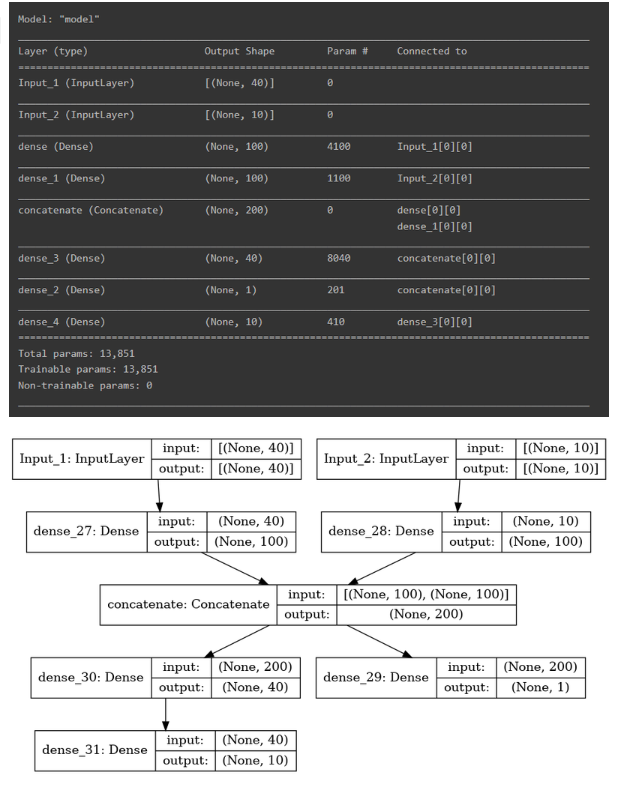


위 표와 그래프는 각각 동일한 모델의 summary() 메서드와 utils.plot_model() 함수의 결과값입니다. 위 모델을 한 번 구현해봅시다.



Model: "your_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_27 (Dense)            multiple                  12000400  
                                                                 
 dense_28 (Dense)            multiple                  80200     
                                                                 
 dense_29 (Dense)            multiple                  20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


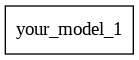

In [38]:
# Functional API 방식 혹은 Subclassing API 방식으로 구현해주세요.

class YourModel(models.Model):
    def __init__(self, **kwargs):
        super(YourModel, self).__init__(**kwargs)
        # Flatten 레이어를 쌓으세요.
        self.flat_layer = layers.Flatten()
        # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer1 = layers.Dense(400, activation='relu')
        # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer2 = layers.Dense(200, activation='relu')
        # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
        self.output_layer = layers.Dense(100, activation='softmax')

    def call(self, inputs):
        # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
        x = self.flat_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.output_layer(x)
        return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()
# [[YOUR CODE]]
utils.plot_model(model)

어떠셨나요? 아직은 조금 어렵나요?

혹시 완성하셨다면 다른 방식으로도 구현해보세요.

두가지 방식 중 한가지만 작성해보셔도 되지만 두가지 모두 능숙해지면 이후 학습에 크게 도움이 될 것입니다.

수고하셨습니다!